In [ ]:
pip install control

In [1]:
import control

In [2]:
s = control.tf('s')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('SO.xlsx')

In [5]:
df.describe()

,t,y
count,2501.000000,2501.000000
mean,1250.000000,0.919894
std,722.120835,0.271625
min,0.000000,0.000000
25%,625.000000,0.975437
50%,1250.000000,1.001276
75%,1875.000000,1.024385
max,2500.000000,1.163033


In [6]:
Max_t = df['t'].max()

In [7]:
Delta_t = df._get_value(1, 't') - df._get_value(0, 't')

In [8]:
Count_t = len(df['t'])

## Optimize

In [9]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [10]:
def fun(x):
    global df
    
    Tau = x[0]
    Zeta = x[1]
    K = x[2]
    
    A = Tau**2
    B = 2*Zeta*Tau
    C = 1
    sys = K/(A*s**2 + B*s + 1)
    
    # Simulate step response
    t_fun, y_fun = control.step_response(sys, T=Max_t, T_num=Count_t)
    df_fun = pd.DataFrame({'t_fun':t_fun, 'y_fun':y_fun})
    
    mse = mean_squared_error(df_fun['y_fun'], df['y'])
    return mse

In [11]:
x0 = [1, 1, 1]

In [12]:
res = minimize(fun, x0, method='Powell', tol=1e-6)

In [13]:
Tau_opt = res.x[0]
Zeta_opt = res.x[1]
K_opt = res.x[2]
A_opt = Tau_opt**2
B_opt = 2*Zeta_opt*Tau_opt
C_opt = 1
sys_opt = K_opt/(A_opt*s**2 + B_opt*s + 1)

In [14]:
print('Tau=', Tau_opt)
print('Zeta=', Zeta_opt)
print('Kp=', K_opt)

Tau= 200.000000000154
Zeta= 0.4999999999994305
Kp= 0.9999999999992688


## Plots

In [15]:
t_opt, y_opt = control.step_response(sys_opt, T=Max_t, T_num=Count_t)

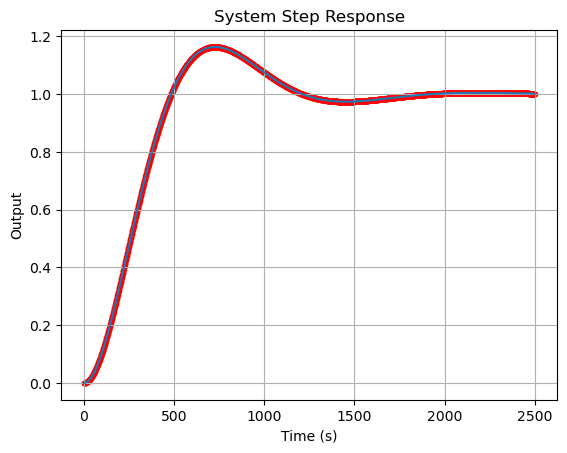

In [16]:
# Plot step response
plt.plot(t_opt,y_opt)
plt.scatter(df['t'], df['y'], marker= ".", color = "red")
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()